In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import LeaveOneOut
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
#Q3-a
def euclidean_distance(a,b):
    a = np.array(a)
    b = np.array(b)
    return math.pow(sum(np.power((a-b),2)),1/2)

In [3]:
#Q3-a
def knn_classifier(df,k):
    #implement LOO method
    cv = LeaveOneOut()
    predictions = []
    distances = np.array([])
    for train, test in cv.split(df):
        X_train, X_test = df.iloc[train, 1:], df.iloc[test, 1:]
       
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        Y_train = df.iloc[train, 0].tolist()
        Train = X_train
        Test = X_test
        #Implement KNN
        for item in Train:
            distances = np.append(distances,euclidean_distance(item,Test[0]))
        sorted_indexes = np.argsort(distances)
        distances = np.array([])
        predictions.append((mode( [Y_train[j] for j in sorted_indexes[:k]])[0][0]))
    return predictions

the least error rate we can get is: 0.0268 with K equal to:  18


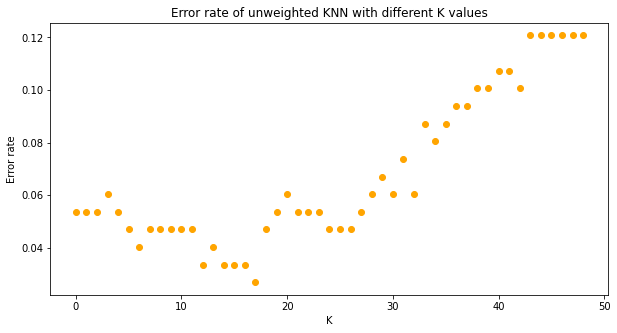

In [4]:
#Q3-b
df = pd.read_csv(r'C:\Users\RSKALA\Downloads\Iris.csv')
df=df.iloc[:,1:]
df.reset_index(drop=True,inplace=True)

#df.columns=['Class','Petal length','Sepal length','Sepal width','Petal width']

df.drop_duplicates(inplace=True)
real = df.iloc[:,0].tolist()
e=[]


for k in range(1,50):
    pred = knn_classifier(df,k)
    e.append(1-accuracy_score(pred,real))
print('the least error rate we can get is: {:.3}'.format(min(e)), 'with K equal to: ',e.index(min(e))+1)
plt.figure(figsize=(10,5))
plt.title('Error rate of unweighted KNN with different K values')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.scatter(list(range(49)),e,c='orange')

# 2

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#split train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#set parametrs for gridsearch
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth' :  list(range(1,11)),'criterion' :['gini', 'entropy']}
clf = DecisionTreeClassifier()
GS = GridSearchCV(estimator=clf,  param_grid = params, cv=5, verbose = 1)
GS.fit(X_train, y_train)

In [ ]:
#printing the resukts of gridsearch
print('Best Criterion:', GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', GS.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:', GS.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min_samples_split:', GS.best_estimator_.get_params()['min_samples_split'])

best_model = GS.best_estimator_
best_model



In [ ]:
# makeprediction usin best model founded by gridsearch
best_model.fit(X_train, y_train)
y_predict = best_model.predict(X_test)

In [ ]:
print('Accuracy of DecisionTreeClassifier is: {:.2f}'.format(accuracy_score(y_test, y_predict)*100),'%') 


In [ ]:
# plotting cofusion matrix

ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap='Purples')
ax.set_title('Confusion Matrix \n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')


ax.xaxis.set_ticklabels(['0','1','2'])
ax.yaxis.set_ticklabels(['0','1','2'])

